# Project Three Notebook - Anyone Home?



I downloaded my data from https://archive.ics.uci.edu/ml/machine-learning-databases/00357/.  The site in which I got my data is as follows: https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+.  It's an archive of machine learning datasets.  My particular dataset is directed to Occupancy Detection based on various variables including temperature, light, humidity, CO2, and HumidityRatio.

In regards to "Data Wrangling" I ensured that I only had number data.  There is a date column in my csv file that I did not remove, but when I coereced the data, the date became numbers.  I did not use the date column for any of my models.

In regards to "Training and Cross Validation" I used a linear regression comparing all the different variables from my dataset minus the date.  The plots and the actual validations make me believe that it's not a very good model.  I attempted to do a logarithmic regression as well, but when I actually attempted to run the regression, I had errors that I was unable to solve on my own.  Part of the problem my be because I do not really understand the dataset.  Another issue is that I have missed the previous class where we discussed this project. I have ensured that I was able to run the code samples and complete this assignment.

In regards to a "Working Model" I believe I have a working model, but I do not believe it's a very good model.



In [8]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning

Here we load the data we collected and get it all ready to feed to our statistical model(s). That is, we are trying to make a table with one **target** column and one or more **features**. Here I'm loading happiness.csv from: https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-responses-2011-2013-20/w898-3dfm Note: you can find information on the data elements at this link. 


In [9]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv('dataset.csv', parse_dates=[0]) 
raw_data_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2015-02-02 14:19:00,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [10]:
# You can explore unique entires by stating the column and using .unique() like this:
print(raw_data_df["Light"].unique())
print(raw_data_df["Temperature"].unique())

[  585.2          578.4          572.6666667    493.75         488.6
   568.6666667    536.3333333    509.           476.           510.           481.5
   481.8          475.25         469.           464.           455.           454.
   458.           473.           498.4          530.2          533.6
   524.25         498.6666667    516.3333333    501.2          522.           520.5
   505.2857143    488.3333333    512.           511.           501.5
   503.6666667    483.1666667    483.5          470.3333333    480.1428571
   474.4          470.           445.           439.           444.25
   454.75         455.8          451.6          457.5          471.5
   475.6666667    467.75         466.5          467.           459.           449.
   462.3333333    456.5          457.           450.25         446.           448.
   444.           435.           432.           429.           432.75
   436.5          438.           435.4285714    434.           441.5          441.
   440.25

In [11]:
# To make sure all of your columns are stored as numbers, use the pd.to_numeric method like so.
raw_data_df = raw_data_df.apply(pd.to_numeric, errors='coerce')
# errors='coerce' will set things that can't be converted to numbers to NaN
# so you'll want to drop these like so.
raw_data_df = raw_data_df.dropna()
raw_data_df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1422886740000000000,23.7000,26.272,585.200000,749.200000,0.004764,1
1,1422886740000000000,23.7180,26.290,578.400000,760.400000,0.004773,1
2,1422886860000000000,23.7300,26.230,572.666667,769.666667,0.004765,1
3,1422886920000000000,23.7225,26.125,493.750000,774.750000,0.004744,1
4,1422886980000000000,23.7540,26.200,488.600000,779.000000,0.004767,1


In [12]:
# I'm now going to make a set of tables to be used in training some models
# The first set will be for linear regressions where the traget is numeric.
# Happiness
occupancy_lin_df = raw_data_df[[
                               'Occupancy', 
                               'Temperature', 
                               'Humidity',
                                'Light',
                                'CO2',
                                'HumidityRatio'
                               ]].copy()
occupancy_lin_df.head()

,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,1,23.7000,26.272,585.200000,749.200000,0.004764
1,1,23.7180,26.290,578.400000,760.400000,0.004773
2,1,23.7300,26.230,572.666667,769.666667,0.004765
3,1,23.7225,26.125,493.750000,774.750000,0.004744
4,1,23.7540,26.200,488.600000,779.000000,0.004767


In [13]:
# The second set will be for classifiers where the target is a class.
# Happiness
occupancy_class_df = raw_data_df[[
                               'Occupancy', 
                               'Temperature', 
                               'Humidity',
                                'Light',
                                'CO2',
                                'HumidityRatio'
                               ]].copy()
occupancy_class_df.head()

,Occupancy,Temperature,Humidity,Light,CO2,HumidityRatio
0,1,23.7000,26.272,585.200000,749.200000,0.004764
1,1,23.7180,26.290,578.400000,760.400000,0.004773
2,1,23.7300,26.230,572.666667,769.666667,0.004765
3,1,23.7225,26.125,493.750000,774.750000,0.004744
4,1,23.7540,26.200,488.600000,779.000000,0.004767


# Training and Validation

Above I created two datasets worth exploring: 
- **`occupancy_lin_df`**. The data needed to access *happiness* along a continuous variable.
- **`occupancy_class_df`**. The data needed to access *happiness* as a categorical variable.

Let's take them each in turn. 

## occupancy_lin_df



In [15]:
data = occupancy_lin_df

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

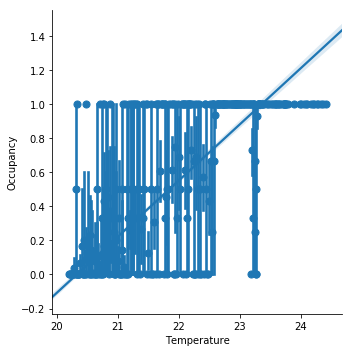

In [16]:
sns.lmplot(x="Temperature", y="Occupancy", data=training, x_estimator=np.mean, order=1)

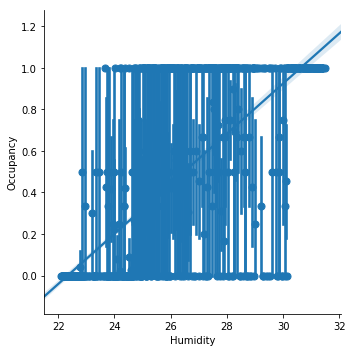

In [17]:
sns.lmplot(x="Humidity", y="Occupancy", data=training, x_estimator=np.mean, order=1)

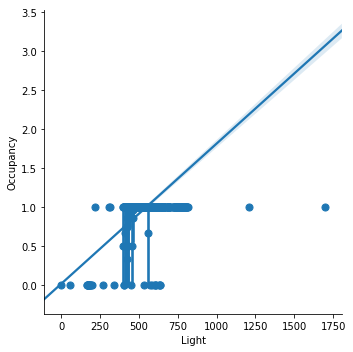

In [18]:
sns.lmplot(x="Light", y="Occupancy", data=training, x_estimator=np.mean, order=1)

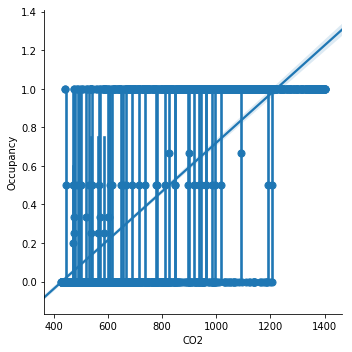

In [19]:
sns.lmplot(x="CO2", y="Occupancy", data=training, x_estimator=np.mean, order=1)

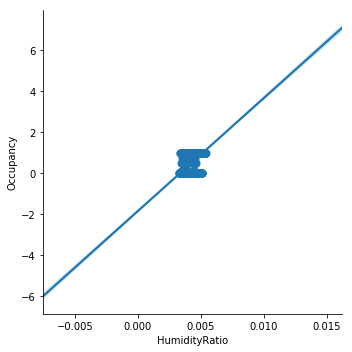

In [20]:
sns.lmplot(x="HumidityRatio", y="Occupancy", data=training, x_estimator=np.mean, order=1)

In [22]:
model = ols("Occupancy ~ Temperature + Humidity + Light + CO2 + HumidityRatio", training).fit()
#model = ols("happy ~ age + income + np.power(age, 2) + np.power(income, 2)", training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Occupancy   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     4062.
Date:                Mon, 04 Dec 2017   Prob (F-statistic):               0.00
Time:                        22:53:20   Log-Likelihood:                 1046.7
No. Observations:                2532   AIC:                            -2081.
Df Residuals:                    2526   BIC:                            -2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.7904      0.813     13.274      0.000       9.196      12.384
Temperature      -0.5494      0.038    -14.362      0.000      -0.624      -0.474
Humidity         -0.2518      0.023    -10.868      0.000      -0.297      -0.206
Light             0.0019   2.44e-05     76.027      0.000       0.002       0.002
CO2            -7.87e-05   5.08e-05     -1.550      0.121      -0.000    2.09e-05
HumidityRatio  1846.1456    149.148     12.378      0.000    1553.681    2138.610
==============================================================================
Omnibus:                     1838.587   Durbin-Watson:                   0.413
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56402.300
Skew:                          -3.072   Prob(JB):                         0.00
Kurtosis:                      25.290   Cond. No.                     3.83e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_train = training["Occupancy"].as_matrix(columns=None)

features_test = holdout.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_test = holdout["Occupancy"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labemodel = ols("Occupancy ~ Temperature + Humidity + Light + CO2 + HumidityRatio", training).fit()
#model = ols("happy ~ age + income + np.power(age, 2) + np.power(income, 2)", training).fit()
model.summary()ls_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.889383481429
Accuracy: 0.836508277887


## occupancy_class_df

Percentage of Ys: 0.3647279549718574



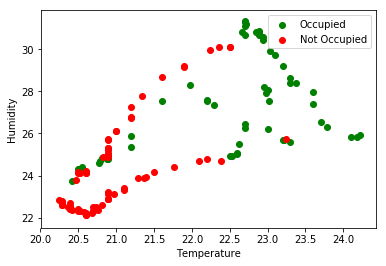

In [25]:
data = occupancy_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_train = training["Occupancy"].as_matrix(columns=None)

features_test = holdout.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_test = holdout["Occupancy"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["Occupancy"]== 1 ])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Occupied")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Not Occupied")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.show()


Percentage of Ys: 0.3647279549718574



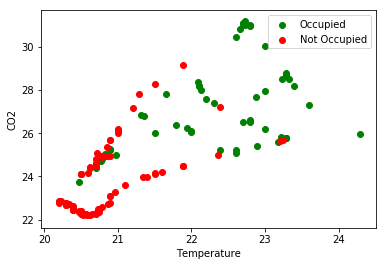

In [29]:
data = occupancy_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_train = training["Occupancy"].as_matrix(columns=None)

features_test = holdout.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_test = holdout["Occupancy"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["Occupancy"]== 1 ])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Occupied")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Not Occupied")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("CO2")
plt.show()

Percentage of Ys: 0.3647279549718574



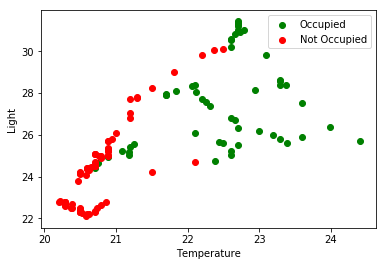

In [30]:
data = occupancy_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_train = training["Occupancy"].as_matrix(columns=None)

features_test = holdout.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_test = holdout["Occupancy"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["Occupancy"]== 1 ])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Occupied")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Not Occupied")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("Light")
plt.show()

Percentage of Ys: 0.3647279549718574



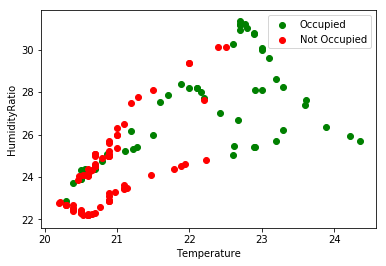

In [31]:
data = occupancy_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_train = training["Occupancy"].as_matrix(columns=None)

features_test = holdout.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_test = holdout["Occupancy"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["Occupancy"]== 1 ])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Occupied")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Not Occupied")
plt.legend()
plt.xlabel("Temperature")
plt.ylabel("HumidityRatio")
plt.show()

Percentage of Ys: 0.3647279549718574



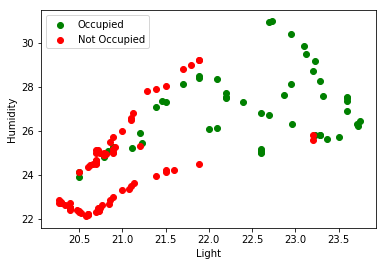

In [32]:
data = occupancy_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_train = training["Occupancy"].as_matrix(columns=None)

features_test = holdout.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_test = holdout["Occupancy"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["Occupancy"]== 1 ])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Occupied")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Not Occupied")
plt.legend()
plt.xlabel("Light")
plt.ylabel("Humidity")
plt.show()

Percentage of Ys: 0.3647279549718574



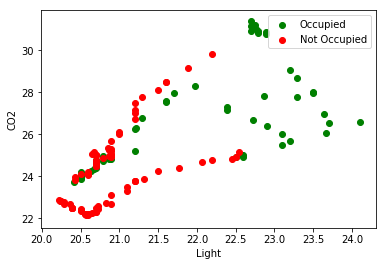

In [33]:
data = occupancy_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_train = training["Occupancy"].as_matrix(columns=None)

features_test = holdout.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_test = holdout["Occupancy"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["Occupancy"]== 1 ])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Occupied")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Not Occupied")
plt.legend()
plt.xlabel("Light")
plt.ylabel("CO2")
plt.show()

Percentage of Ys: 0.3647279549718574



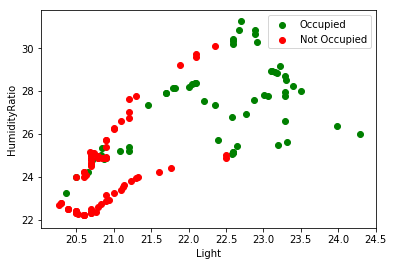

In [34]:
data = occupancy_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_train = training["Occupancy"].as_matrix(columns=None)

features_test = holdout.drop("Occupancy", axis=1).as_matrix(columns=None)
labels_test = holdout["Occupancy"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["Occupancy"]== 1 ])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 0]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]== 1]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Occupied")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="Not Occupied")
plt.legend()
plt.xlabel("Light")
plt.ylabel("HumidityRatio")
plt.show()